# ANÁLISE MORFOLÓGICA DO LATIM
## aplicação do algoritmo k-means

In [1]:
import pandas as pd
import seaborn as sns
import pylab as plt

In [2]:
arquivo = open("a3.txt","r")

In [3]:
texto = arquivo.read()

In [4]:
lista = texto.split('\n')

In [5]:
df = pd.DataFrame( data=lista, columns=["verba"])

In [6]:
df["litterae"] = df["verba"].apply(len)

In [7]:
print(df["litterae"].max(), df["litterae"].min())

17 0


<Axes: xlabel='litterae', ylabel='Count'>

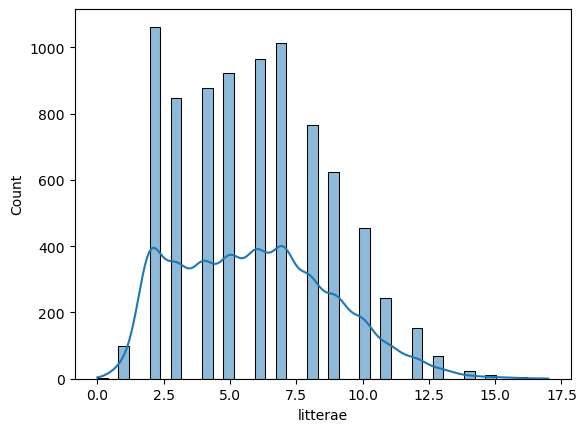

In [8]:
# Visualizando média de tamanho das palavras
sns.histplot( data=df, x="litterae", kde=True )

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

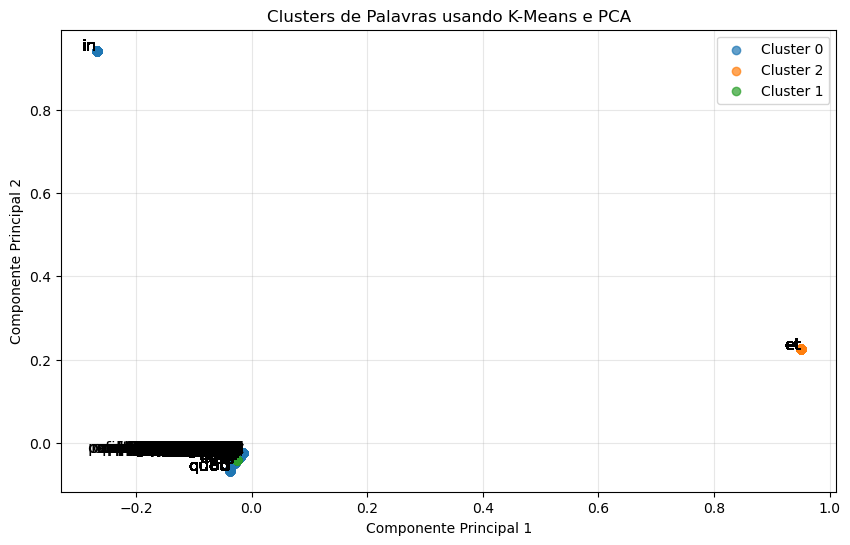

In [22]:
palavras = df["verba"].array

# Converter as palavras em representações numéricas com TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(palavras)

# Aplicando K-Means com 3 clusters (exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Redução para 2D com PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Criando DataFrame para visualização
df_clusters = pd.DataFrame({"Palavra": palavras, "Cluster": labels, 
                            "X": X_pca[:, 0], "Y": X_pca[:, 1]})

plt.figure(figsize=(10, 6))
for cluster in df_clusters["Cluster"].unique():
    subset = df_clusters[df_clusters["Cluster"] == cluster]
    plt.scatter(subset["X"], subset["Y"], label=f"Cluster {cluster}", alpha=0.7)

# Adicionando rótulos das palavras nos pontos do gráfico
for i, row in df_clusters.iterrows():
    plt.text(row["X"], row["Y"], row["Palavra"], fontsize=12, ha="right")

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters de Palavras usando K-Means e PCA")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
